In [1]:
import tensorflow as tf

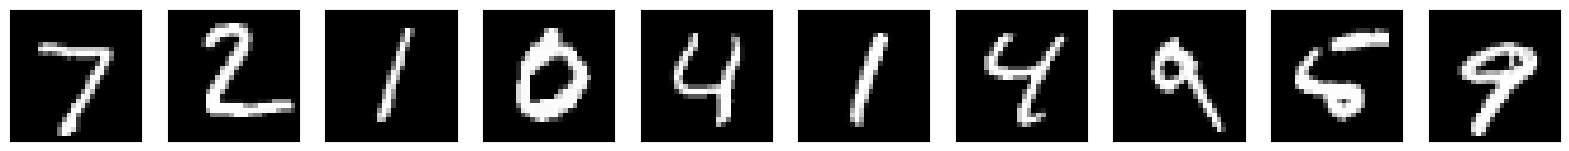

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

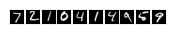

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(2, 2))



for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

![image.png](attachment:image.png)

In [4]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [9]:
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3),
                 input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2),  padding='same'))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

## THIRD SET OF LAYERS
# CONVOLUTIONAL LAYER
#encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
#encode_model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
encode_model.add(Flatten(input_shape=[7,7,8]))
encode_model.add(Dense(7*7*8,activation="relu"))
encode_model.add(Dense(30,activation="relu"))

In [10]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))


In [11]:
autoencoder = Sequential([encode_model, decode_model])
#autoencoder.add(encode_model)
#autoencoder.add(decode_model)

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [13]:
autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 30)                167166    
                                                                 
 sequential_4 (Sequential)   (None, 28, 28, 1)         14049     
                                                                 
Total params: 181215 (707.87 KB)
Trainable params: 181215 (707.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
encode_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 392)               0         
                                                                 
 dense_2 (Dense)             (None, 392)              

In [18]:
decode_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 392)               12152     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_3 (UpSamplin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 28, 28, 16)        0         
 g2D)                                                 

In [20]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255
x_train.shape

(60000, 28, 28, 1)

In [21]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [22]:
# Train the model
autoencoder.fit(x=x_train, y=x_train,  epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 10s 8ms/step - loss: 0.6919 - val_loss: 0.6906
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6890 - val_loss: 0.6872
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6852 - val_loss: 0.6830
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6804 - val_loss: 0.6776
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6742 - val_loss: 0.6704
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6657 - val_loss: 0.6605
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6537 - val_loss: 0.6460
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6353 - val_loss: 0.6229
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6051 - val_loss: 0.5837
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5518 - val_loss: 0.513

313/313 [==============================] - 2s 5ms/step


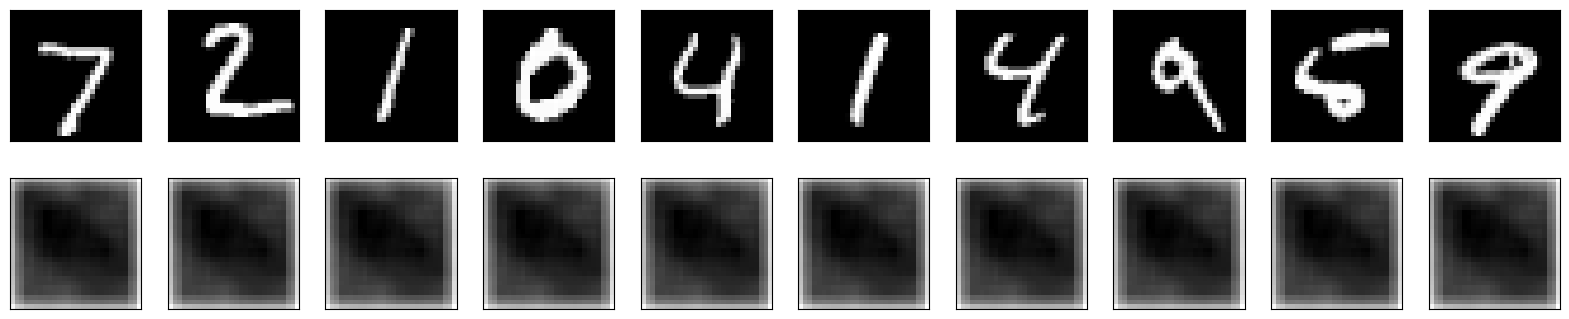

In [23]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()